In [1]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Model
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
test_data = y_test
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6767 - accuracy: 0.3937 - val_loss: 1.3956 - val_accuracy: 0.4844
Epoch 2/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.3293 - accuracy: 0.5243 - val_loss: 1.1920 - val_accuracy: 0.5710
Epoch 3/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.1925 - accuracy: 0.5778 - val_loss: 1.1368 - val_accuracy: 0.5898
Epoch 4/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.1031 - accuracy: 0.6084 - val_loss: 1.0810 - val_accuracy: 0.6151
Epoch 5/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.0262 - accuracy: 0.6368 - val_loss: 1.0483 - val_accuracy: 0.6262
Epoch 6/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9669 - accuracy: 0.6589 - val_loss: 1.0155 - val_accuracy: 0.6424
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9183 - accuracy: 0.6773 - val_loss:

In [10]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test  loss:', scores[0])
print('Test  accuracy:', scores[1])
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 7s 24ms/step - loss: 0.9699 - accuracy: 0.6620
Test  loss: 0.9698757529258728
Test  accuracy: 0.6620000004768372
Accuracy: 66.20%


In [11]:
##NEW MODEL
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
new_model.add(Dropout(0.2))
new_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
new_model.add(Dropout(0.2))
new_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
new_model.add(Dropout(0.2))
new_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Flatten())
new_model.add(Dropout(0.2))
new_model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
new_model.add(Dropout(0.2))
new_model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
new_model.add(Dropout(0.2))
new_model.add(Dense(num_classes, activation='softmax'))

In [12]:
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
new_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
print(new_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [14]:
# Fit the model
history = new_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 395s 252ms/step - loss: 1.8501 - accuracy: 0.3121 - val_loss: 1.4961 - val_accuracy: 0.4588
Epoch 2/10
1563/1563 [==============================] - 282s 181ms/step - loss: 1.4284 - accuracy: 0.4789 - val_loss: 1.2903 - val_accuracy: 0.5329
Epoch 3/10
1563/1563 [==============================] - 251s 160ms/step - loss: 1.2461 - accuracy: 0.5507 - val_loss: 1.1893 - val_accuracy: 0.5716
Epoch 4/10
1563/1563 [==============================] - 266s 170ms/step - loss: 1.1260 - accuracy: 0.5950 - val_loss: 1.0257 - val_accuracy: 0.6342
Epoch 5/10
1563/1563 [==============================] - 258s 165ms/step - loss: 1.0352 - accuracy: 0.6305 - val_loss: 0.9720 - val_accuracy: 0.6585
Epoch 6/10
1563/1563 [==============================] - 266s 170ms/step - loss: 0.9630 - accuracy: 0.6572 - val_loss: 0.9382 - val_accuracy: 0.6703
Epoch 7/10
1563/1563 [==============================] - 251s 161ms/step - loss: 0.9065 - accuracy: 0.6757 - val_

In [15]:
# Final evaluation of the model
scores = new_model.evaluate(X_test, y_test, verbose=1)
print('Test  loss:', scores[0])
print('Test  accuracy:', scores[1])
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 9s 28ms/step - loss: 0.7841 - accuracy: 0.7289
Test  loss: 0.7841346263885498
Test  accuracy: 0.7289000153541565
Accuracy: 72.89%


In [16]:
new_model.save('new_model.h5')

In [17]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('new_model.h5')

In [18]:
print(loaded_model.predict_classes(X_train[[0],:]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[6]


In [35]:
print(loaded_model.predict_classes(X_test[[0],:]))

[3]


In [36]:
print(test_data[0])

[3]


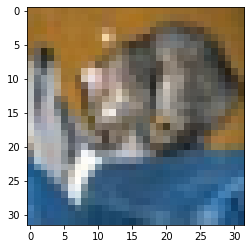

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0,:,:])  
plt.show()

In [37]:
print(loaded_model.predict_classes(X_test[[1],:]))

[8]


In [38]:
print(test_data[1])

[8]


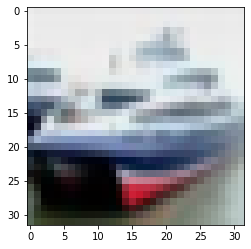

In [39]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1,:,:])  
plt.show()

In [40]:
print(loaded_model.predict_classes(X_test[[2],:]))

[8]


In [41]:
print(test_data[2])

[8]


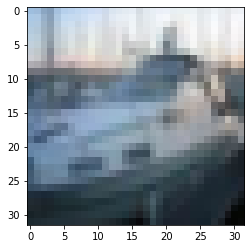

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X_test[2,:,:])  
plt.show()

In [42]:
print(loaded_model.predict_classes(X_test[[3],:]))

[0]


In [43]:
print(test_data[3])

[0]


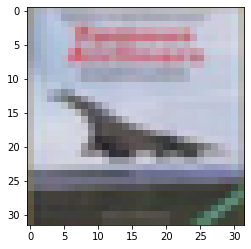

In [44]:
import matplotlib.pyplot as plt
plt.imshow(X_test[3,:,:])  
plt.show()

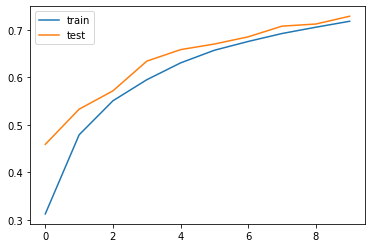

In [30]:
##ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

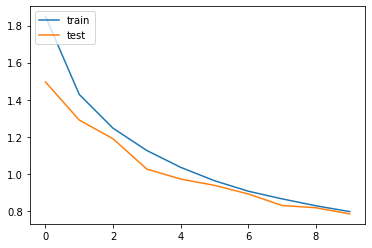

In [31]:
## LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()